In [1]:
from cassie import CassieEnv, MyCallbacks
import constants as c 
import functions as f 
import numpy as np
import loader as l 
import caps as cp 
import torch
from ray.tune.registry import register_env
from ray.rllib.agents.ppo import PPOTrainer
import mediapy as media 

DEBUG:matplotlib:matplotlib data path: c:\Users\Ajvendetta\miniconda3\lib\site-packages\matplotlib\mpl-data
DEBUG:matplotlib:CONFIGDIR=C:\Users\Ajvendetta\.matplotlib


Device is  cuda


DEBUG:matplotlib:interactive is False
DEBUG:matplotlib:platform is win32


In [2]:
import torch

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [4]:
device

device(type='cuda')

In [5]:

logdir = "./logs"
simdir = "./sims"
loader = l.Loader(logdir, simdir)
fps = 40

In [6]:
configs = loader.load_config("ConfigSimplified.yaml")
flattened = {}
for key in configs.keys():
    for key2 in configs[key].keys():
        flattened[key2] = configs[key][key2]

{'training': {'gamma': 0.99, 'lr': 0.0001, 'train_batch_size': 50000, 'model': {'fcnet_hiddens': [256, 256], 'fcnet_activation': 'swish', 'vf_share_layers': False, 'free_log_std': True}, 'optimizer': {'type': 'adam'}, 'use_critic': True, 'use_gae': True, 'lambda_': 0.95, 'kl_coeff': 0.2, 'sgd_minibatch_size': 9000, 'num_sgd_iter': 5, 'vf_loss_coeff': 0.5, 'entropy_coeff': 0.01, 'clip_param': 0.3, 'kl_target': 0.2}, 'environment': {'env': 'cassie-v0', 'disable_env_checking': True}, 'framework': {'framework': 'tf2', 'eager_tracing': True}, 'rollouts': {'recreate_failed_workers': True, 'num_workers': 20, 'num_envs_per_worker': 1, 'rollout_fragment_length': 'auto', 'batch_mode': 'truncate_episodes', 'observation_filter': 'NoFilter', 'reuse_actors': True}, 'evaluation': {'evaluation_interval': 2, 'evaluation_duration': 10}, 'ressources': {'num_gpus': 1, 'num_cpus_per_worker': 1, 'num_gpus_per_worker': 0.05}}


In [7]:
register_env("cassie-v0", lambda config: CassieEnv(config))

In [8]:
env = CassieEnv(flattened)
env.reset()

(array([ 4.04500917e-01,  5.04840757e-01,  3.83901440e-01,  8.78037537e-01,
         1.26990120e+00,  5.00118962e-01, -4.08202648e-01,  1.27267075e+00,
         6.04615540e-01,  4.95247164e-01,  3.85823293e-01,  1.19141522e+00,
         1.26843990e+00,  4.99775765e-01, -4.08245302e-01,  1.27264153e+00,
         4.99887343e-01,  4.99934536e-01,  5.00007814e-01,  9.99942076e-01,
         2.45128279e-04, -7.25465090e-03, -7.94702096e-03,  0.00000000e+00,
         1.00000000e+00]),
 {})

In [9]:
caps = cp.CAPSTorchPolicy(env.observation_space, env.action_space, {})

2023-04-27 00:32:33,127	INFO policy.py:1214 -- Policy (worker=local) running on CPU.
2023-04-27 00:32:33,128	INFO torch_policy_v2.py:110 -- Found 1 visible cuda devices.


In [10]:
#load a cassie checkpoint 
config = "testing_configs.yaml"
loader = l.Loader()
config = loader.load_config(config)
Trainer = PPOTrainer
splitted = loader.split_config(config)
combined = {
    **splitted.get("environment", {}),
    **splitted.get("rollouts", {}),
    **splitted.get("checkpointing", {}),
    **splitted.get("debugging", {}),
    **splitted.get("training", {}),
    **splitted.get("framework", {}),
    **splitted.get("resources", {}),
    **splitted.get("evaluation", {}),
}
combined["callbacks"] = MyCallbacks
trainer = Trainer(config=combined, env="cassie-v0")
trainer.restore("Trainer_Policies\checkpoint_001875")

2023-04-27 00:32:33,181	WARNING algorithm_config.py:596 -- Cannot create PPOConfig from given `config_dict`! Property num_cpus not supported.
2023-04-27 00:32:33,181	WARNING deprecation.py:50 -- DeprecationWarning: `algo = Algorithm(env='cassie-v0', ...)` has been deprecated. Use `algo = AlgorithmConfig().environment('cassie-v0').build()` instead. This will raise an error in the future!
2023-04-27 00:32:33,211	INFO algorithm.py:506 -- Current log_level is WARN. For more information, set 'log_level': 'INFO' / 'DEBUG' or use the -v and -vv flags.


{'training': {'gamma': 0.99, 'lr': 0.001, 'train_batch_size': 15000, 'model': {'fcnet_hiddens': [128, 128], 'fcnet_activation': 'swish', 'vf_share_layers': False, 'free_log_std': True}, 'optimizer': {'type': 'adam'}, 'use_critic': True, 'use_gae': True, 'lambda_': 0.95, 'kl_coeff': 0.2, 'sgd_minibatch_size': 5000, 'num_sgd_iter': 3, 'shuffle_sequences': True, 'vf_loss_coeff': 0.5, 'entropy_coeff': 0.01, 'clip_param': 0.3, 'vf_clip_param': 1000, 'grad_clip': 100, 'kl_target': 0.01}, 'environment': {'env': 'cassie-v0', 'disable_env_checking': True}, 'framework': {'framework': 'torch'}, 'rollouts': {'num_rollout_workers': 1, 'num_envs_per_worker': 1, 'rollout_fragment_length': 'auto', 'batch_mode': 'truncate_episodes', 'recreate_failed_workers': True, 'observation_filter': 'NoFilter', 'compress_observations': True}, 'evaluation': {'evaluation_interval': 2, 'evaluation_duration': 10}, 'checkpointing': {'export_native_model_files': True}, 'debugging': {'log_sys_usage': False}, 'resources': 

2023-04-27 00:32:35,143	INFO worker.py:1553 -- Started a local Ray instance.


(RolloutWorker pid=24352) Device is  cuda


2023-04-27 00:32:42,554	INFO trainable.py:791 -- Restored on 127.0.0.1 from checkpoint: Trainer_Policies\checkpoint_001875
2023-04-27 00:32:42,554	INFO trainable.py:800 -- Current state after restoring: {'_iteration': 1875, '_timesteps_total': None, '_time_total': 22801.8750371933, '_episodes_total': 246383}


In [11]:
obs,_ = env.reset()


In [12]:
obs

array([ 0.39699904,  0.50450031,  0.38515287,  0.8786129 ,  1.27638554,
        0.49979204, -0.40828204,  1.27280044,  0.60320883,  0.49823501,
        0.38503395,  1.19275965,  1.27295142,  0.49982327, -0.40823496,
        1.27273176,  0.4999819 ,  0.50009711,  0.49998518,  0.99990139,
        0.00782298,  0.00876254,  0.00769549,  0.        ,  1.        ])

In [13]:
trainer.workers.local_worker().filters[0](obs)


array([ 0.39699904,  0.50450031,  0.38515287,  0.8786129 ,  1.27638554,
        0.49979204, -0.40828204,  1.27280044,  0.60320883,  0.49823501,
        0.38503395,  1.19275965,  1.27295142,  0.49982327, -0.40823496,
        1.27273176,  0.4999819 ,  0.50009711,  0.49998518,  0.99990139,
        0.00782298,  0.00876254,  0.00769549,  0.        ,  1.        ])

DEBUG:matplotlib:CACHEDIR=C:\Users\Ajvendetta\.matplotlib
DEBUG:matplotlib.font_manager:Using fontManager instance from C:\Users\Ajvendetta\.matplotlib\fontlist-v330.json
DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='c:\\Users\\Ajvendetta\\miniconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSansMono-BoldOblique.ttf', name='DejaVu Sans Mono', style='oblique', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='c:\\Users\\Ajvendetta\\miniconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXGeneral.ttf', name='STIXGeneral', style='norma

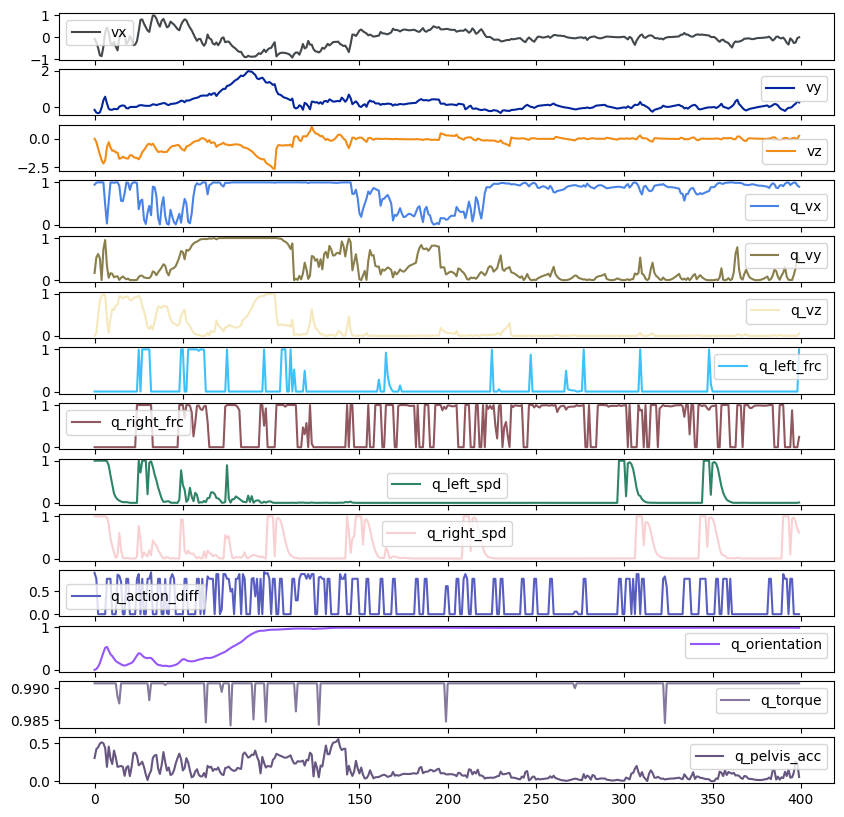

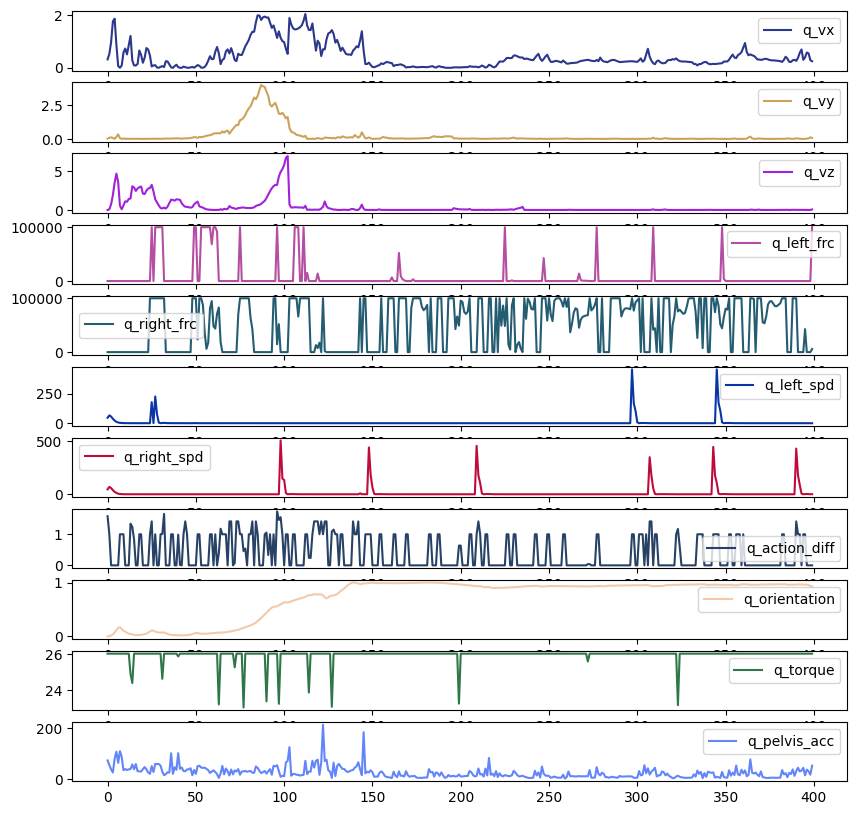

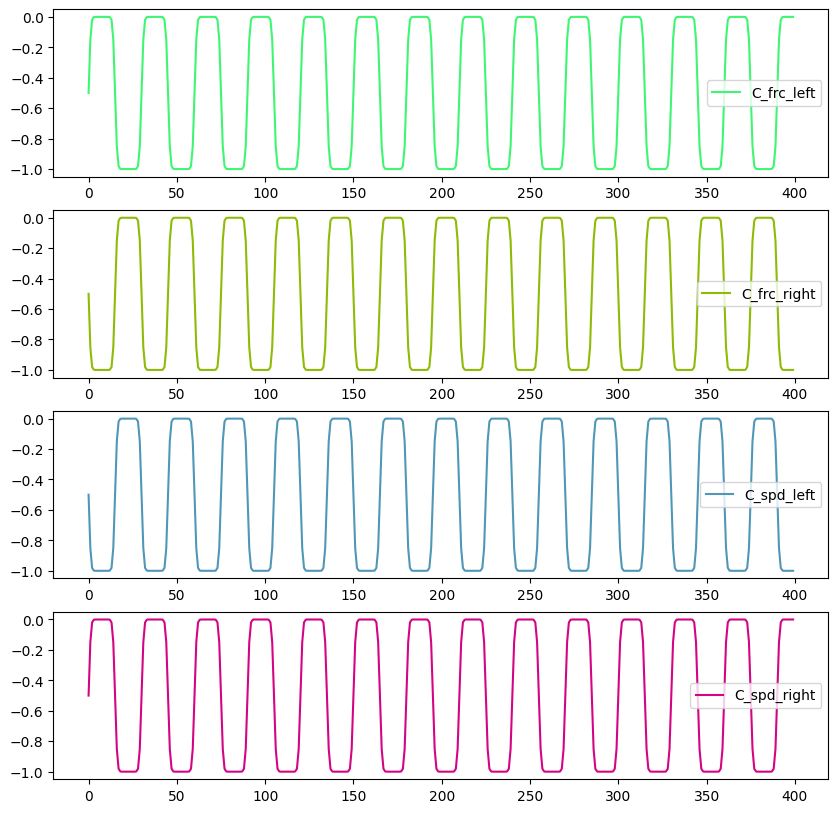

In [14]:
#show a video of 100steps of the environment and register some metrics 
env = CassieEnv(flattened)
obs,_ = env.reset()
env.render_mode = "rgb_array"
metrics = {}
frames = []
metrics["vx"] = []
metrics["vy"] = []
metrics["vz"] = []
C = {}
exponents = {}
max_steps = 400
number_of_rounds = 4
for i in range(max_steps):
    action = trainer.compute_single_action(obs)
    obs, reward, terminated, _, _ = env.step(action)
    frames.append(env.render())
    metrics["vz"] .append( env.data.qvel[2])
    metrics["vx"] .append( env.data.qvel[0])
    metrics["vy"] .append( env.data.qvel[1])
    for exponent, value in env.exponents.items():
        if exponent not in exponents.keys():
            exponents[exponent] = [value]
        else:
            exponents[exponent].append(value)
    for metric,value in env.used_quantities.items():
        if metric not in metrics.keys():
            metrics[metric] = [value]
        else:
            metrics[metric].append(value)

    for key,value in env.C.items():
        if key not in C.keys():
            C[key] = [value]
        else:
            C[key].append(value)

env.close()
#save video 
media.show_video( frames, fps=fps)
#plot the metrics stacked in a vertical way in multiple subplots
import matplotlib.pyplot as plt
fig, axs = plt.subplots(len(metrics.keys()), 1, figsize=(10, 10))
for i, metric in enumerate(metrics.keys()):
    #choose a random color for the plot 
    s = np.random.rand(3,)

    axs[i].plot(metrics[metric], color=s)
    axs[i].legend([metric])

plt.show()


#do the same thing for the exponents
fig, axs = plt.subplots(len(exponents.keys()), 1, figsize=(10, 10))
for i, metric in enumerate(exponents.keys()):
    #choose a random color for the plot 
    s = np.random.rand(3,)

    axs[i].plot(np.clip(exponents[metric],0,100000), color=s)
    axs[i].legend([metric])

plt.show()

#do the same for C 
fig, axs = plt.subplots(len(C.keys()), 1, figsize=(10, 10))
for i, metric in enumerate(C.keys()):
    #choose a random color for the plot 
    s = np.random.rand(3,)

    axs[i].plot(C[metric], color=s)
    axs[i].legend([metric])

In [15]:
train_batch = {'obs': [], 'actions': []}
for i in range(2):
    obs, reward, done,_, info = env.step(env.action_space.sample())
    train_batch['obs'].append(obs)
    train_batch['actions'].append(env.action_space.sample())
    if done:
        env.reset()

train_batch['obs'] = np.array(train_batch['obs'])
train_batch['actions'] = np.array(train_batch['actions'])


In [16]:
train_batch['obs'][0]

array([ 0.22756312,  0.72992185,  0.27532736,  0.86390352,  1.02768033,
        0.50020233, -0.40974382,  1.26782633,  0.77014666,  0.73155939,
        0.56218056,  1.22051776,  1.07283313,  0.50221607, -0.41131564,
        1.26872939,  0.50949996,  0.44740234,  0.52667562,  0.25587063,
        0.11545418, -0.87278649,  0.39930476,  0.8660254 , -0.5       ])

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
model = nn.Sequential(
nn.Linear(25, 10),
nn.ReLU(),
nn.Linear(10, 10),
nn.ReLU(),
nn.Linear(10, 10),
nn.Sigmoid()
).to(device)

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters())

print(model)


Sequential(
  (0): Linear(in_features=25, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=10, bias=True)
  (3): ReLU()
  (4): Linear(in_features=10, out_features=10, bias=True)
  (5): Sigmoid()
)


In [18]:
torch.tensor(c.act_ranges[:,1]-c.act_ranges[:,0])

C:\Users\Ajvendetta\AppData\Local\Temp\ipykernel_3912\2800571735.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(c.act_ranges[:,1]-c.act_ranges[:,0])


tensor([ 9.0000,  9.0000, 24.4000, 24.4000,  1.8000,  9.0000,  9.0000, 24.4000,
        24.4000,  1.8000])

In [19]:
train_batch = {'obs': [], 'actions': []}
for i in range(2):
    obs, reward, done,_, info = env.step(env.action_space.sample())
    train_batch['obs'].append(obs)
    train_batch['actions'].append(env.action_space.sample())
    if done:
        env.reset()

train_batch['obs'] = torch.tensor(train_batch['obs']).float().to(device)
train_batch['actions'] = torch.tensor(train_batch['actions']).float().to(device)

loss = 0 
# get the observations and actions
obs, actions = train_batch["obs"], train_batch["actions"]

logits = model(obs)


#get a bunch of normal distribution around 
dist = torch.distributions.Normal(obs, 0.01 )

around_obs = dist.sample()
print(around_obs)
logits_around = model(around_obs)

print(logits)
print(logits_around)

L_S = torch.mean(torch.mean(torch.abs(logits-logits_around),axis=1))
L_T = torch.mean(torch.abs(actions[1:,:] - actions[:-1,:]))

print(1000*L_S)
print(L_T)
# add the loss of the state around the observations to the loss
loss += L_S
loss += L_T

# Backpropagate and update the model parameters
optimizer.zero_grad()
loss.backward()
optimizer.step()

print("Loss: ", loss.item())

C:\Users\Ajvendetta\AppData\Local\Temp\ipykernel_3912\3323351765.py:9: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ..\torch\csrc\utils\tensor_new.cpp:248.)
  train_batch['obs'] = torch.tensor(train_batch['obs']).float().to(device)


tensor([[ 0.4203,  0.5125,  0.3979,  0.8811,  1.2036,  0.5061, -0.4075,  1.2543,
          0.5926,  0.4977,  0.3993,  1.1655,  1.2089,  0.5018, -0.4460,  1.2699,
          0.4907,  0.3983,  0.5167,  0.9921,  0.0059, -0.0282,  0.0019,  0.2018,
          0.9843],
        [ 0.4598,  0.5424,  0.3936,  0.8964,  1.1077,  0.5013, -0.4058,  1.2669,
          0.5799,  0.4792,  0.3979,  1.1722,  1.1272,  0.5031, -0.3948,  1.2640,
          0.4779,  0.3912,  0.4953,  1.0044,  0.0210, -0.0612, -0.0065,  0.3997,
          0.9193]], device='cuda:0')
tensor([[0.5549, 0.5311, 0.5389, 0.5355, 0.5258, 0.5310, 0.5741, 0.4727, 0.5119,
         0.4963],
        [0.5548, 0.5331, 0.5392, 0.5371, 0.5253, 0.5292, 0.5748, 0.4746, 0.5143,
         0.4983]], device='cuda:0', grad_fn=<SigmoidBackward0>)
tensor([[0.5545, 0.5307, 0.5391, 0.5345, 0.5261, 0.5312, 0.5740, 0.4724, 0.5118,
         0.4959],
        [0.5551, 0.5329, 0.5390, 0.5373, 0.5255, 0.5296, 0.5750, 0.4745, 0.5140,
         0.4980]], device='cuda:0'

In [20]:
loss

tensor(3.9854, device='cuda:0', grad_fn=<AddBackward0>)

In [21]:
env.data.contact

<_MjContactList
  H: array([], shape=(0, 36), dtype=float64)
  dim: array([], dtype=int32)
  dist: array([], dtype=float64)
  efc_address: array([], dtype=int32)
  exclude: array([], dtype=int32)
  frame: array([], shape=(0, 9), dtype=float64)
  friction: array([], shape=(0, 5), dtype=float64)
  geom1: array([], dtype=int32)
  geom2: array([], dtype=int32)
  includemargin: array([], dtype=float64)
  mu: array([], dtype=float64)
  pos: array([], shape=(0, 3), dtype=float64)
  solimp: array([], shape=(0, 5), dtype=float64)
  solref: array([], shape=(0, 2), dtype=float64)
>

In [22]:
import mujoco as m 

In [23]:
contact_force_right_foot = np.zeros(6)
m.mj_contactForce(env.model, env.data, 0, contact_force_right_foot)
print(contact_force_right_foot)

[0. 0. 0. 0. 0. 0.]


In [24]:
env.render_mode = 'rgb_array'

In [25]:
right_forces = [    
]
left_forces = [
]

In [26]:
env.reset()

(array([ 4.01280410e-01,  4.95784776e-01,  3.85028465e-01,  8.78653367e-01,
         1.27659698e+00,  4.99931941e-01, -4.08182144e-01,  1.27280467e+00,
         6.04778193e-01,  4.94681173e-01,  3.84745762e-01,  1.19331895e+00,
         1.26949481e+00,  4.99865279e-01, -4.08300190e-01,  1.27266262e+00,
         5.00015275e-01,  4.99942834e-01,  5.00089978e-01,  9.99990353e-01,
         1.23656309e-03, -3.72843736e-03,  1.96563135e-03,  0.00000000e+00,
         1.00000000e+00]),
 {})

In [27]:
np.where(env.model.name_bodyadr == 7)

(array([0], dtype=int64),)

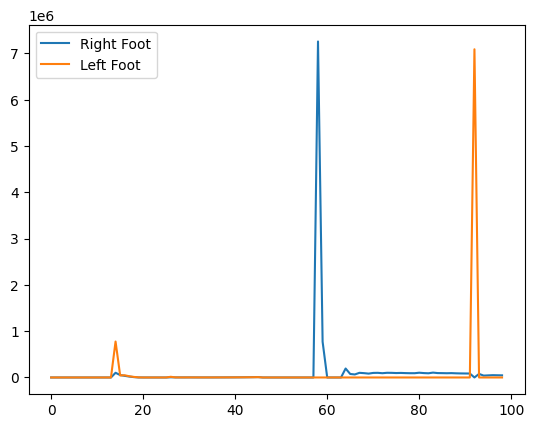

In [28]:
env.reset()

contact_force_right_foot = np.zeros(6)
frames = []
for i in range(100):
    env.step(np.zeros(10))

    x = np.zeros(6)
    m.mj_contactForce(env.model, env.data, 0, x)
    right_forces.append(np.linalg.norm(x))
    x = np.zeros(6)
    m.mj_contactForce(env.model, env.data, 1, x)
    left_forces.append(np.linalg.norm(x))
    frames.append(env.render())
media.show_video(frames,fps = fps)

import matplotlib.pyplot as plt

#remove values that are extremely high
right_forces = [x**2 for x in right_forces if x < 4000]
left_forces = [x**2 for x in left_forces if x < 4000]

plt.plot(right_forces)
plt.plot(left_forces)
plt.legend(["Right Foot", "Left Foot"])
plt.show()

In [29]:
env.reset()

(array([ 0.4054619 ,  0.49663433,  0.38432765,  0.87841729,  1.26864786,
         0.49975561, -0.40821615,  1.27264568,  0.59968866,  0.5027691 ,
         0.38552127,  1.19121847,  1.27262888,  0.49992992, -0.40825513,
         1.2727253 ,  0.50009009,  0.50003476,  0.49989755,  0.99992882,
         0.00648348,  0.00563595,  0.00828024,  0.        ,  1.        ]),
 {})

In [30]:

contact_force_right_foot = np.zeros(6)
env.step(np.zeros(10))
for j,_ in enumerate(env.data.contact):
    m.mj_contactForce(env.model, env.data, j, contact_force_right_foot)
    print(np.linalg.norm(contact_force_right_foot))

In [31]:
phases = np.random.rand(10)*2*np.pi

In [32]:
# phases = np.array([6.18362032, 1.70033932, 4.43265421, 5.00719267, 4.62093139,
#        5.64687259, 2.36063639, 1.51925016, 1.33412746, 3.90058806])

In [33]:
phases = np.zeros(10)

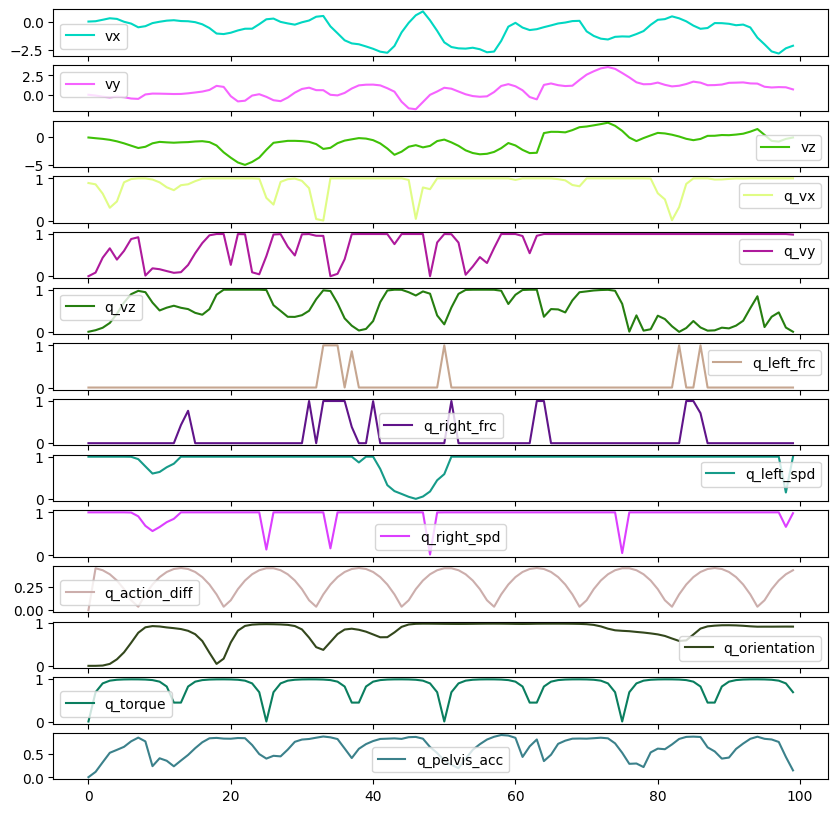

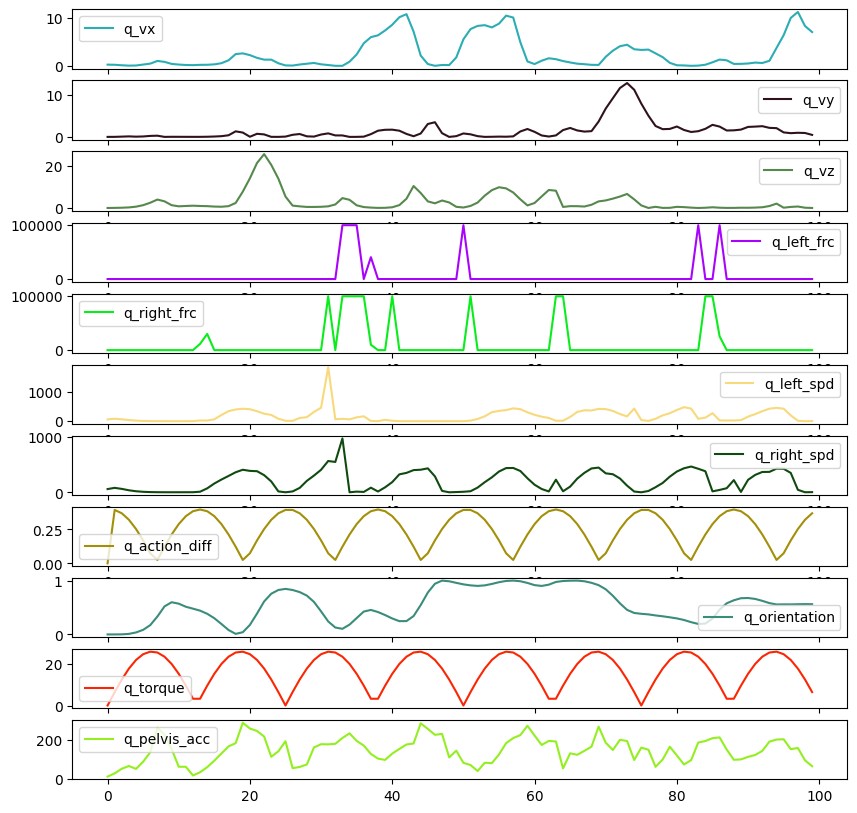

In [34]:
#show a video of 100steps of the environment and register some metrics 
env = CassieEnv(flattened)
env.reset()
env.render_mode = "rgb_array"
metrics = {}
frames = []
metrics["vx"] = []
metrics["vy"] = []
metrics["vz"] = []
exponents = {}
max_steps = 100
number_of_rounds = 4
print
for i in range(max_steps):
    action = np.sin(number_of_rounds*i/max_steps*2*np.pi+phases)*np.array(list(c.actuator_ranges.values()))[:,1]
    observation, reward, terminated, _, _ = env.step(action)
    frames.append(env.render())
    metrics["vz"] .append( env.data.qvel[2])
    metrics["vx"] .append( env.data.qvel[0])
    metrics["vy"] .append( env.data.qvel[1])
    for exponent, value in env.exponents.items():
        if exponent not in exponents.keys():
            exponents[exponent] = [value]
        else:
            exponents[exponent].append(value)
    for metric,value in env.used_quantities.items():
        if metric not in metrics.keys():
            metrics[metric] = [value]
        else:
            metrics[metric].append(value)
env.close()
#save video 
media.show_video( frames, fps=fps)
#plot the metrics stacked in a vertical way in multiple subplots
import matplotlib.pyplot as plt
fig, axs = plt.subplots(len(metrics.keys()), 1, figsize=(10, 10))
for i, metric in enumerate(metrics.keys()):
    #choose a random color for the plot 
    s = np.random.rand(3,)

    axs[i].plot(metrics[metric], color=s)
    axs[i].legend([metric])

plt.show()


#do the same thing for the exponents
fig, axs = plt.subplots(len(exponents.keys()), 1, figsize=(10, 10))
for i, metric in enumerate(exponents.keys()):
    #choose a random color for the plot 
    s = np.random.rand(3,)

    axs[i].plot(np.clip(exponents[metric],0,100000), color=s)
    axs[i].legend([metric])

plt.show()



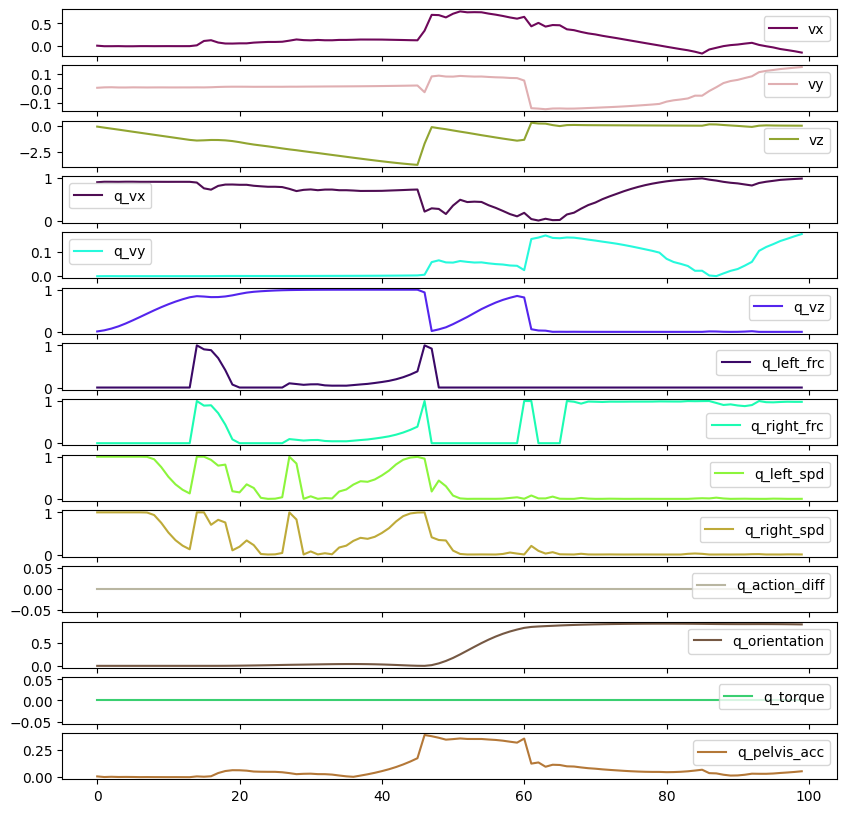

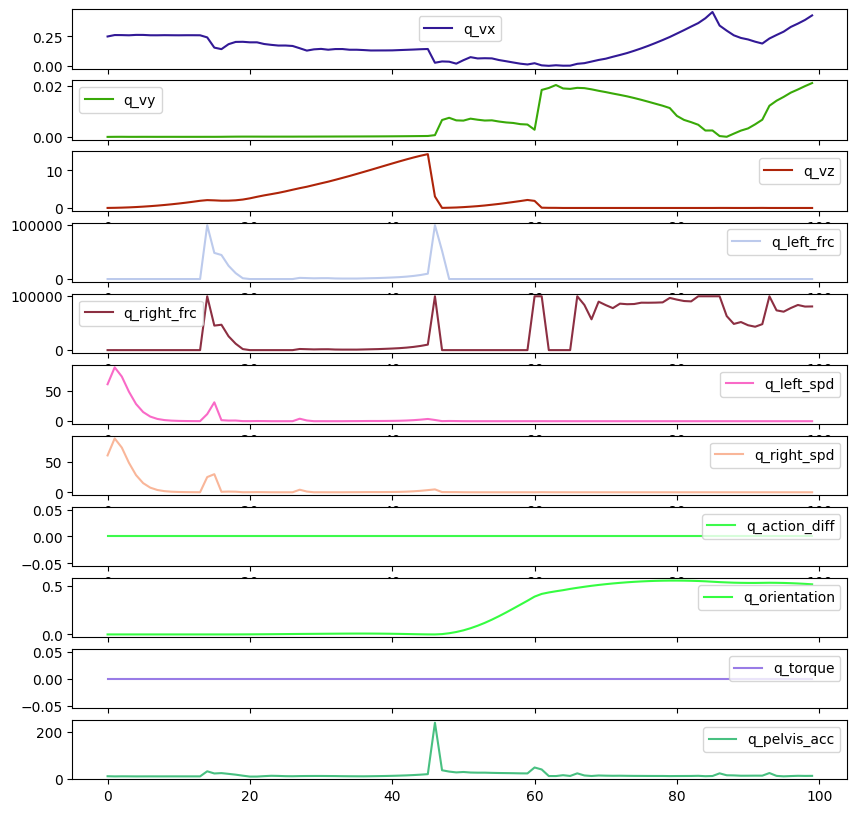

In [35]:
#show a video of 100steps of the environment and register some metrics 
env = CassieEnv(flattened)
env.reset()
env.render_mode = "rgb_array"
metrics = {}
frames = []
metrics["vx"] = []
metrics["vy"] = []
metrics["vz"] = []
exponents = {}
max_steps = 100
number_of_rounds = 4
print
for i in range(max_steps):
    action = np.zeros(10)
    observation, reward, terminated, _, _ = env.step(action)
    frames.append(env.render())
    metrics["vz"] .append( env.data.qvel[2])
    metrics["vx"] .append( env.data.qvel[0])
    metrics["vy"] .append( env.data.qvel[1])
    for exponent, value in env.exponents.items():
        if exponent not in exponents.keys():
            exponents[exponent] = [value]
        else:
            exponents[exponent].append(value)
    for metric,value in env.used_quantities.items():
        if metric not in metrics.keys():
            metrics[metric] = [value]
        else:
            metrics[metric].append(value)
env.close()
#save video 
media.show_video( frames, fps=fps)
#plot the metrics stacked in a vertical way in multiple subplots
import matplotlib.pyplot as plt
fig, axs = plt.subplots(len(metrics.keys()), 1, figsize=(10, 10))
for i, metric in enumerate(metrics.keys()):
    #choose a random color for the plot 
    s = np.random.rand(3,)

    axs[i].plot(metrics[metric], color=s)
    axs[i].legend([metric])

plt.show()


#do the same thing for the exponents
fig, axs = plt.subplots(len(exponents.keys()), 1, figsize=(10, 10))
for i, metric in enumerate(exponents.keys()):
    #choose a random color for the plot 
    s = np.random.rand(3,)

    axs[i].plot(np.clip(exponents[metric],0,100000), color=s)
    axs[i].legend([metric])

plt.show()



In [36]:
# trainer = PPOTrainer(env = 'cassie-v0',config = flattened)